In [37]:
# Import modules we need
import sklearn
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# preparing the data we need
irisData = load_iris()

X = irisData.data
y = irisData.target

In [39]:
# Doing some Hyperparameter tuning to find the best value of k
# Here, we use cross_val_score to calculate the average accuracy for a value of k
kRange = range(1,31)

for k in kRange:
  print('-----START-----')
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,X,y,cv=10)
  mean=0
  for i in scores:
    mean+=i

  # We view the avg. score for the value of k
  print('k={}, cross validation score={}'.format(k,mean/len(scores)))
  print('-----END-----')

  # From observation, I suspect that a k of 13 might be the best for this dataset

-----START-----
k=1, cross validation score=0.9600000000000002
-----END-----
-----START-----
k=2, cross validation score=0.9533333333333335
-----END-----
-----START-----
k=3, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=4, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=5, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=6, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=7, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=8, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=9, cross validation score=0.9733333333333334
-----END-----
-----START-----
k=10, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=11, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=12, cross validation score=0.9733333333333334
-----END-----
-----START-----
k=13, cross validation score=0.9800000000000001
-----END-

In [40]:
# We suspect the best value of k for this dataset is 13
# Let's confirm using GridSearchCV

# Build some params. for the operation
knn = KNeighborsClassifier(n_neighbors=5)
parmGrid = dict(n_neighbors=kRange)
grid = GridSearchCV(knn,parmGrid,cv=10,scoring='accuracy')

In [41]:
# run it
grid.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 31)}, scoring='accuracy')

In [42]:
# basic view of results from gridsearchcv
grid.cv_results_

{'mean_fit_time': array([0.00103593, 0.00088544, 0.00096865, 0.00088134, 0.00086238,
        0.00088377, 0.00083978, 0.00088997, 0.00091214, 0.00082669,
        0.00083275, 0.00086114, 0.0008136 , 0.00085835, 0.00125144,
        0.00093067, 0.00087135, 0.00081811, 0.00079484, 0.000826  ,
        0.00084074, 0.00119102, 0.00080137, 0.00081313, 0.00087054,
        0.00091884, 0.00083964, 0.00084338, 0.00094011, 0.00082207]),
 'std_fit_time': array([2.29037004e-04, 4.53832505e-05, 1.34366408e-04, 8.04052793e-05,
        5.75949859e-05, 9.33548520e-05, 2.00931987e-05, 9.84131595e-05,
        1.03841832e-04, 3.87513739e-05, 3.17989612e-05, 6.87701395e-05,
        1.54888607e-05, 1.44499040e-04, 1.52443782e-04, 1.47156546e-04,
        8.47677837e-05, 1.11263593e-05, 1.70581121e-05, 3.34699692e-05,
        3.75549829e-05, 1.70694657e-04, 1.69289951e-05, 2.50696314e-05,
        1.19408682e-04, 8.65426240e-05, 3.36636649e-05, 5.01934476e-05,
        2.55090353e-04, 2.39458202e-05]),
 'mean_scor

In [43]:
# gather mean scores
gridMeanScores = [result for result in grid.cv_results_['mean_test_score']]

In [44]:
# and we can see that gridsearchcv chose as the best
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


Text(0, 0.5, 'Cross-Validated Accuracy')

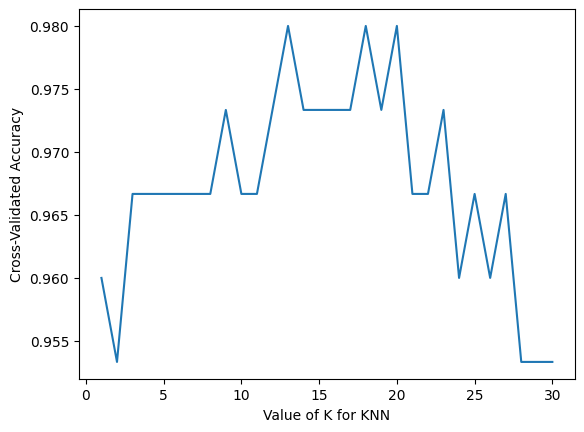

In [45]:
# Let us also plot the scores
plt.plot(kRange,gridMeanScores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [46]:
# with this new information, let's run the tests again with a more limited scope
kRange = range(10,16)

for k in kRange:
  print('-----START-----')
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn,X,y,cv=10)
  mean=0
  for i in scores:
    mean+=i

  # We view the avg. score for the value of k
  print('k={}, cross validation score={}'.format(k,mean/len(scores)))
  print('-----END-----')

-----START-----
k=10, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=11, cross validation score=0.9666666666666668
-----END-----
-----START-----
k=12, cross validation score=0.9733333333333334
-----END-----
-----START-----
k=13, cross validation score=0.9800000000000001
-----END-----
-----START-----
k=14, cross validation score=0.9733333333333334
-----END-----
-----START-----
k=15, cross validation score=0.9733333333333334
-----END-----


In [47]:
# and do another GridSearchCV
knn = KNeighborsClassifier(n_neighbors=5)
parmGrid = dict(n_neighbors=kRange)
grid = GridSearchCV(knn,parmGrid,cv=10,scoring='accuracy')
grid.fit(X,y)

gridMeanScores = [result for result in grid.cv_results_['mean_test_score']]

In [48]:
# view results again
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9800000000000001
{'n_neighbors': 13}
KNeighborsClassifier(n_neighbors=13)


Text(0, 0.5, 'Cross-Validated Accuracy')

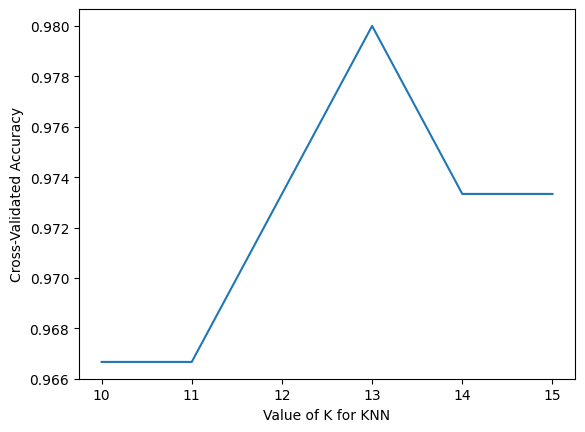

In [49]:
# plot again
plt.plot(kRange,gridMeanScores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# from the graph, we can see that 13 is the best value of k